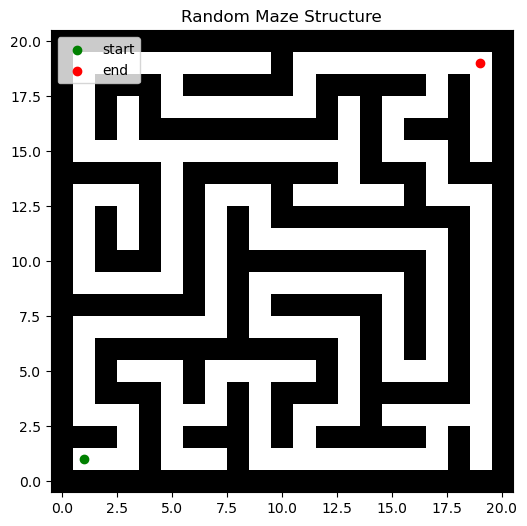

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 迷宮參數
maze_size = (21, 21)  # 奇數：保證牆與通道交錯（偶數容易不規則）
maze = np.ones(maze_size, dtype=int)  # 1 = 牆, 0 = 通道

# 深度優先生成隨機迷宮 (recursive backtracking)
def carve_passages(cx, cy):
    directions = [(2, 0), (-2, 0), (0, 2), (0, -2)]
    random.shuffle(directions)
    for dx, dy in directions:
        nx, ny = cx + dx, cy + dy
        if 1 <= nx < maze_size[0]-1 and 1 <= ny < maze_size[1]-1 and maze[nx, ny] == 1:
            maze[cx + dx//2, cy + dy//2] = 0  # 打通中間
            maze[nx, ny] = 0                  # 打通目標格
            carve_passages(nx, ny)

# 起點在 (1,1)
maze[1,1] = 0
carve_passages(1, 1)

# 加入起點與終點
start = (1, 1)
end = (maze_size[0]-2, maze_size[1]-2)
maze[end] = 0

# 顯示迷宮
plt.figure(figsize=(6,6))
plt.imshow(maze.T, cmap='binary', origin='lower')
plt.scatter([start[0]], [start[1]], c='green', label='start')
plt.scatter([end[0]], [end[1]], c='red', label='end')
plt.legend()
plt.title("Random Maze Structure")
plt.show()


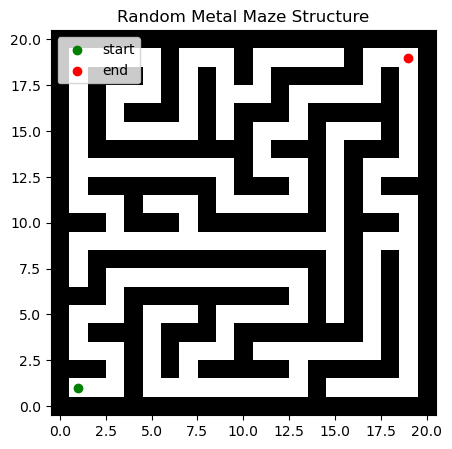

-----------
Initializing structure...
time for choose_chunkdivision = 0.00144315 s
Working in 2D dimensions.
Computational cell is 21 x 21 x 0 with resolution 50
     block, center = (-10,-10,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     block, center = (-10,-9,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     block, center = (-10,-8,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     block, center = (-10,-7,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     block, center = (-10,-6,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = 

FloatProgress(value=0.0, description='0% done ', max=1000.0)

Meep progress: 8.120000000000001/1000.0 = 0.8% done in 4.0s, 488.7s to go
on time step 814 (time=8.14), 0.00491722 s/step
Meep progress: 19.12/1000.0 = 1.9% done in 8.0s, 410.5s to go
on time step 1916 (time=19.16), 0.00363294 s/step
Meep progress: 30.26/1000.0 = 3.0% done in 12.0s, 384.6s to go
on time step 3030 (time=30.3), 0.00359218 s/step
Meep progress: 41.06/1000.0 = 4.1% done in 16.0s, 373.8s to go
on time step 4111 (time=41.11), 0.00370187 s/step
Meep progress: 52.63/1000.0 = 5.3% done in 20.0s, 360.1s to go
on time step 5269 (time=52.69), 0.00345698 s/step
Meep progress: 63.54/1000.0 = 6.4% done in 24.0s, 353.9s to go
on time step 6359 (time=63.59), 0.00367046 s/step
Meep progress: 74.89/1000.0 = 7.5% done in 28.0s, 346.0s to go
on time step 7495 (time=74.95), 0.00352173 s/step
Meep progress: 85.9/1000.0 = 8.6% done in 32.0s, 340.7s to go
on time step 8596 (time=85.96), 0.00363565 s/step
Meep progress: 97.12/1000.0 = 9.7% done in 36.0s, 334.8s to go
on time step 9719 (time=97.

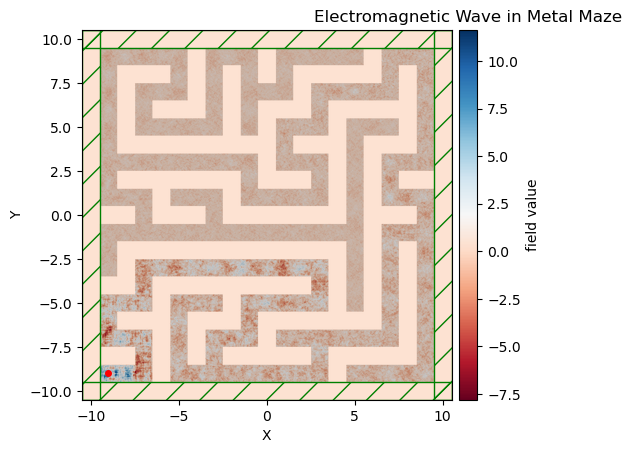

In [6]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
import random

# ============ 生成隨機迷宮 ============

maze_size = (21, 21)
maze = np.ones(maze_size, dtype=int)  # 1 = 牆, 0 = 通道

def carve_passages(cx, cy):
    directions = [(2, 0), (-2, 0), (0, 2), (0, -2)]
    random.shuffle(directions)
    for dx, dy in directions:
        nx, ny = cx + dx, cy + dy
        if 1 <= nx < maze_size[0]-1 and 1 <= ny < maze_size[1]-1 and maze[nx, ny] == 1:
            maze[cx + dx//2, cy + dy//2] = 0
            maze[nx, ny] = 0
            carve_passages(nx, ny)

maze[1,1] = 0
carve_passages(1, 1)

start = (1, 1)
end = (maze_size[0]-2, maze_size[1]-2)
maze[end] = 0

# 顯示迷宮結構
plt.figure(figsize=(5,5))
plt.imshow(maze.T, cmap='binary', origin='lower')
plt.scatter([start[0]], [start[1]], c='green', label='start')
plt.scatter([end[0]], [end[1]], c='red', label='end')
plt.legend()
plt.title("Random Metal Maze Structure")
plt.show()


# ============ 建立 Meep 幾何結構 ============

geometry = []
cell_x, cell_y = maze_size

for i in range(maze_size[0]):
    for j in range(maze_size[1]):
        if maze[i, j] == 1:
            geometry.append(
                mp.Block(
                    size=mp.Vector3(1, 1, mp.inf),
                    center=mp.Vector3(i - cell_x/2 + 0.5, j - cell_y/2 + 0.5),
                    material=mp.metal
                )
            )

# ============ Meep 模擬設定 ============

cell = mp.Vector3(cell_x, cell_y, 0)
resolution = 50
pml_layers = [mp.PML(1.0)]

# 光源位置（起點）
source_pos = mp.Vector3(start[0] - cell_x/2 + 0.5,
                        start[1] - cell_y/2 + 0.5)

sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=0.2),
        component=mp.Ez,
        center=source_pos,
        amplitude=20.0
    )
]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)

# 執行模擬
sim.run(until=1000)

# ============ 繪製電場分布 ============

sim.plot2D(fields=mp.Ez,
           field_parameters={'cmap': 'RdBu', 'colorbar': True})
plt.title("Electromagnetic Wave in Metal Maze")
plt.show()


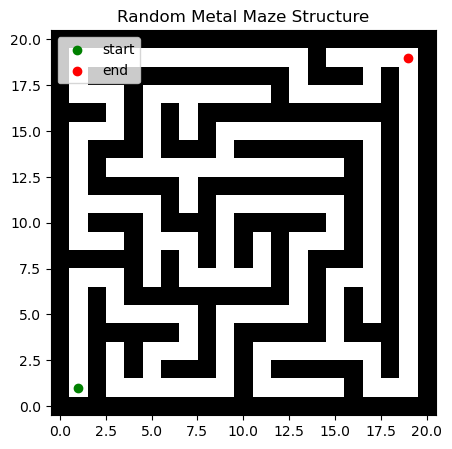

-----------
Initializing structure...
time for choose_chunkdivision = 0.00143194 s
Working in 2D dimensions.
Computational cell is 21 x 21 x 0 with resolution 50
     block, center = (-10,-10,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     block, center = (-10,-9,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     block, center = (-10,-8,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     block, center = (-10,-7,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     block, center = (-10,-6,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = 

FloatProgress(value=0.0, description='0% done ', max=5000.0)

Meep progress: 8.31/5000.0 = 0.2% done in 4.0s, 2403.2s to go
on time step 832 (time=8.32), 0.00480843 s/step
Meep progress: 19.38/5000.0 = 0.4% done in 8.0s, 2056.3s to go
on time step 1940 (time=19.4), 0.00361279 s/step
Meep progress: 30.77/5000.0 = 0.6% done in 12.0s, 1938.2s to go
on time step 3080 (time=30.8), 0.00351129 s/step
Meep progress: 42.1/5000.0 = 0.8% done in 16.0s, 1884.8s to go
on time step 4213 (time=42.13), 0.0035309 s/step
Meep progress: 53.54/5000.0 = 1.1% done in 20.0s, 1848.5s to go
on time step 5357 (time=53.57), 0.00349764 s/step
Meep progress: 64.93/5000.0 = 1.3% done in 24.0s, 1824.8s to go
on time step 6497 (time=64.97), 0.00351182 s/step
Meep progress: 76.28/5000.0 = 1.5% done in 28.0s, 1808.0s to go
on time step 7633 (time=76.33), 0.00352261 s/step
Meep progress: 86.45/5000.0 = 1.7% done in 32.0s, 1819.3s to go
on time step 8650 (time=86.5), 0.00393601 s/step
Meep progress: 96.56/5000.0 = 1.9% done in 36.0s, 1828.8s to go
on time step 9661 (time=96.61), 0.

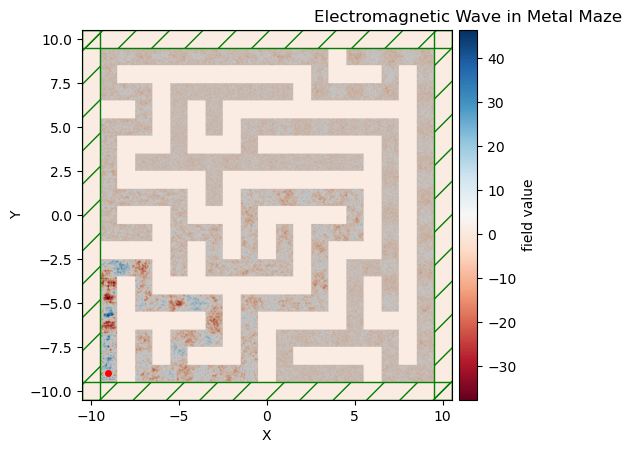

In [7]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
import random

# ============ 生成隨機迷宮 ============

maze_size = (21, 21)
maze = np.ones(maze_size, dtype=int)  # 1 = 牆, 0 = 通道

def carve_passages(cx, cy):
    directions = [(2, 0), (-2, 0), (0, 2), (0, -2)]
    random.shuffle(directions)
    for dx, dy in directions:
        nx, ny = cx + dx, cy + dy
        if 1 <= nx < maze_size[0]-1 and 1 <= ny < maze_size[1]-1 and maze[nx, ny] == 1:
            maze[cx + dx//2, cy + dy//2] = 0
            maze[nx, ny] = 0
            carve_passages(nx, ny)

maze[1,1] = 0
carve_passages(1, 1)

start = (1, 1)
end = (maze_size[0]-2, maze_size[1]-2)
maze[end] = 0

# 顯示迷宮結構
plt.figure(figsize=(5,5))
plt.imshow(maze.T, cmap='binary', origin='lower')
plt.scatter([start[0]], [start[1]], c='green', label='start')
plt.scatter([end[0]], [end[1]], c='red', label='end')
plt.legend()
plt.title("Random Metal Maze Structure")
plt.show()


# ============ 建立 Meep 幾何結構 ============

geometry = []
cell_x, cell_y = maze_size

for i in range(maze_size[0]):
    for j in range(maze_size[1]):
        if maze[i, j] == 1:
            geometry.append(
                mp.Block(
                    size=mp.Vector3(1, 1, mp.inf),
                    center=mp.Vector3(i - cell_x/2 + 0.5, j - cell_y/2 + 0.5),
                    material=mp.metal
                )
            )

# ============ Meep 模擬設定 ============

cell = mp.Vector3(cell_x, cell_y, 0)
resolution = 50
pml_layers = [mp.PML(1.0)]

# 光源位置（起點）
source_pos = mp.Vector3(start[0] - cell_x/2 + 0.5,
                        start[1] - cell_y/2 + 0.5)

sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=0.2),
        component=mp.Ez,
        center=source_pos,
        amplitude=100.0
    )
]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)

# 執行模擬
sim.run(until=5000)

# ============ 繪製電場分布 ============

sim.plot2D(fields=mp.Ez,
           field_parameters={'cmap': 'RdBu', 'colorbar': True})
plt.title("Electromagnetic Wave in Metal Maze")
plt.show()
